In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = np.array ([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.8, 2.7, 1.5],
    [2.0, 3.4, 0.9],
    [1.0, 2.9, 0.4],
    [1.5, 1.6, 0.8],
    [1.2, 2.6, 1.7]
    
])
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.8,2.7,1.5
6,2.0,3.4,0.9
7,1.0,2.9,0.4
8,1.5,1.6,0.8
9,1.2,2.6,1.7


In [9]:
standardized_data = (df - df.mean()) / df.std()
standardized_data

,X,Y,Z
0,0.763925,-0.050965,0.200446
1,-1.661233,-2.216965,-1.603567
2,0.400151,0.586094,0.601338
3,0.036377,-0.305788,0.000000
4,1.491472,0.713506,1.202676
5,1.127699,0.331271,0.801784
6,0.157635,1.223153,-0.400892
7,-1.054944,0.586094,-1.403122
8,-0.448654,-1.070259,-0.601338
9,-0.812428,0.203859,1.202676


In [10]:
cov_matrix = np.cov(standardized_data.T)
cov_matrix

array([[1.        , 0.57713167, 0.71836711],
       [0.57713167, 1.        , 0.51078353],
       [0.71836711, 0.51078353, 1.        ]])

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


In [6]:
sorted_indices = np.argsort(eig_vals) [::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [11]:
eig_vecs_subset = eig_vecs[:, :2]

In [12]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns= ['PC1', 'PC2'])

In [13]:
print("\nReduced Data (after PCA): \n", reduced_df)


Reduced Data (after PCA): 
         PC1       PC2
0  0.552879  0.338927
1 -3.138497  0.620461
2  0.910231 -0.086645
3 -0.142272  0.263386
4  1.992547  0.386581
5  1.331548  0.412179
6  0.517315 -1.172772
7 -1.147603 -1.451802
8 -1.199744  0.476208
9  0.323596  0.213476


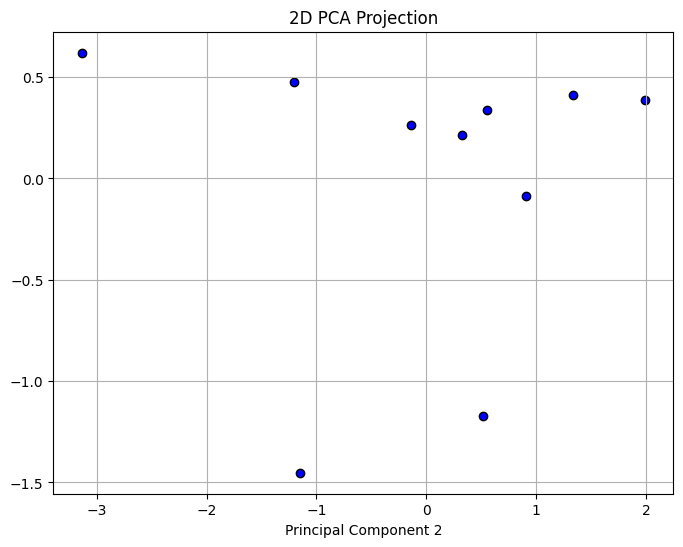

In [14]:
plt.figure(figsize= (8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color = 'blue', edgecolors='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.grid(True)
plt.show()
